In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
pyma_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
pyma_data.head(11)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [20]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# using a groupby to get all measurements of central tendancy. Then put it in a data frame to put it all in a table.
# I wanted to put Drug regime and timepoint together because I think its important to make the distinction of each timepoint
tumor_volume_mean=pyma_data.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].mean()
tumor_volume_median=pyma_data.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].median()
tumor_volume_standard_deviation=pyma_data.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].std()
tumor_volume_sem=pyma_data.groupby(['Drug Regimen','Timepoint'])['Tumor Volume (mm3)'].sem()



tumor_volume_measures_df=pd.DataFrame({"Tumor Volume Average(mm3)": tumor_volume_mean,
                                   "Tumor Volume Median": tumor_volume_median,
                                   "Tumor Standard Deviation": tumor_volume_standard_deviation,
                                   "Tumor Standard Error": tumor_volume_sem})
tumor_volume_measures_df.head(60)
                             


Tumor Volume Average(mm3)  Tumor Volume Median  \
Drug Regimen Timepoint                                                   
Capomulin    0                          45.000000            45.000000   
             5                          44.266086            45.597064   
             10                         43.084291            43.421014   
             15                         42.064317            42.798160   
             20                         40.716325            40.716428   
             25                         39.939528            40.224165   
             30                         38.769339            39.260371   
             35                         37.816839            38.360455   
             40                         36.958001            36.843898   
             45                         36.236114            37.311846   
Ceftamin     0                          45.000000            45.000000   
             5                          46.503051            46.370798   
             10                         48.285125            48.164520   
             15                         50.094055            49.746427   
             20                         52.157049            52.112973   
             25                         54.287674            54.275954   
             30                         56.769517            56.362744   
             35                         58.827548            58.208362   
             40                         61.467895            60.600972   
             45                         64.132421            64.299830   
Infubinol    0                          45.000000            45.000000   
             5                          46.541247            46.870483   
             10                         49.403909            49.471244   
             15                         51.296397            51.265440   
             20                         53.197691            53.862724   
             25                         55.715252            55.924633   
             30                         58.299397            59.133640   
             35                         60.742461            60.722723   
             40                         63.162824            63.344283   
             45                         65.755562            66.083066   
Ketapril     0                          45.000000            45.000000   
             5                          47.389175            47.059664   
             10                         49.582269            49.797416   
             15                         52.399974            52.246310   
             20                         54.920935            54.250054   
             25                         57.678982            56.957917   
             30                         60.994507            60.296505   
             35                         63.371686            62.539154   
             40                         66.068580            66.229606   
             45                         70.662958            69.872251   
Naftisol     0                          45.000000            45.000000   
             5                          46.796098            46.621301   
             10                         48.694210            48.185373   
             15                         50.933018            50.666054   
             20                         53.644087            52.855576   
             25                         56.731968            56.928663   
             30                         59.559509            59.789636   
             35                         62.685087            61.893153   
             40                         65.600754            65.466074   
             45                         69.265506            69.563621   
Placebo      0                          45.000000            45.000000   
             5                          47.125589            46.989764   
             10             

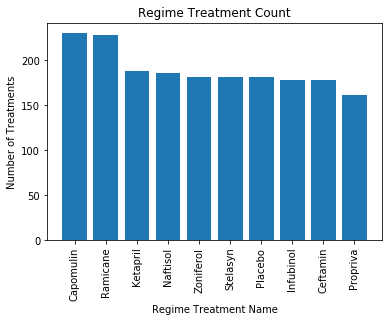

In [3]:
#Generate bar plot showing number of data points for each treatment regimen using pyplot

# count the number of treatments
drug_regimen_count= pyma_data["Drug Regimen"].value_counts()
# define x and y axis
x_axis=drug_regimen_count.index.values
y_axis=drug_regimen_count.values
# .value_counts()
plt.bar(x_axis,y_axis)

plt.title("Regime Treatment Count")
plt.xlabel("Regime Treatment Name")
plt.ylabel("Number of Treatments")
plt.bar(x_axis, y_axis, facecolor="blue", alpha=0, align="center")
plt.xticks(rotation=90)
plt.show()



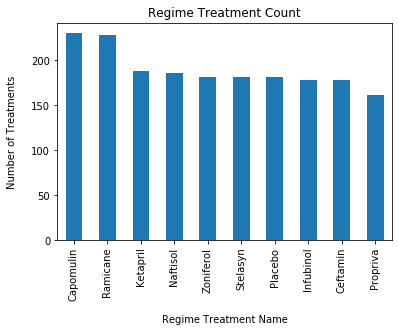

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
pyma_data['Drug Regimen'].value_counts().plot(kind='bar')
plt.xlabel("Regime Treatment Name", labelpad=14)
plt.ylabel("Number of Treatments", labelpad=14)
plt.title("Regime Treatment Count", y=1);

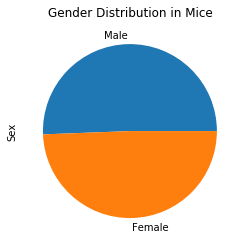

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pyma_data['Sex'].value_counts().plot(kind='pie',title="Gender Distribution in Mice")


[958 935]
['Male' 'Female']


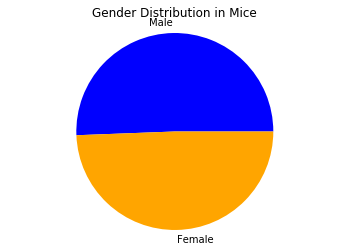

In [6]:
#  Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
# that shows the distribution of female or male mice in the study.

gender_mice= pyma_data["Sex"].value_counts()

gender=gender_mice.index.values
gender_count=gender_mice.values

print(gender_count)
print(gender)


genders = ["Male","Female"]
count = [958, 935]
colors = ["blue", "orange"]


plt.title("Gender Distribution in Mice")
plt.pie(count, labels=genders, colors=colors)
plt.axis("equal")
plt.show()

In [7]:
# * Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin. 
# Pull up data from each specific drug regimen and the calculate the average of the volume 

# example: only_billys = df.loc[df["first_name"] == "Billy", :]
capomulin = pyma_data.loc[pyma_data["Drug Regimen"] == "Capomulin", :]
ramicane = pyma_data.loc[pyma_data["Drug Regimen"] == "Ramicane", :]
infubinol = pyma_data.loc[pyma_data["Drug Regimen"] == "Infubinol", :]
ceftamin = pyma_data.loc[pyma_data["Drug Regimen"] == "Ceftamin", :]

final_average_capomulin=capomulin.groupby(['Mouse ID','Drug Regimen']).mean()["Tumor Volume (mm3)"]
final_average_ramicane=ramicane.groupby(['Mouse ID','Drug Regimen']).mean()["Tumor Volume (mm3)"]
final_average_infubinol=infubinol.groupby(['Mouse ID','Drug Regimen']).mean()["Tumor Volume (mm3)"]
final_average_ceftamin=ceftamin.groupby(['Mouse ID','Drug Regimen']).mean()["Tumor Volume (mm3)"]

# print(capomulin)

capomulin.df=pd.DataFrame(final_average_capomulin)
ramicane.df=pd.DataFrame(final_average_ramicane)
infubinol.df=pd.DataFrame(final_average_infubinol)
ceftamin.df=pd.DataFrame(final_average_ceftamin)

capomulin.df.head()



C:\Users\angel\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
C:\Users\angel\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
C:\Users\angel\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
C:\Users\angel\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,,Tumor Volume (mm3)
Mouse ID,Drug Regimen,
b128,Capomulin,41.963636
b742,Capomulin,40.083699
f966,Capomulin,36.505973
g288,Capomulin,41.990097
g316,Capomulin,44.613344


In [10]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
#use the dataframes with the information of the average volumes to get the quartiles, IQR and potential outliers

quartilescapo = capomulin.df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqcapo = quartilescapo[0.25]
upperqcapo = quartilescapo[0.75]
iqrcapo = upperqcapo-lowerqcapo

print(f"The lower quartile of occupancy for Capomulin is: {lowerqcapo}")
print(f"The upper quartile of occupancy for Capomulin is: {upperqcapo}")
print(f"The interquartile range of occupancy Capomulin is: {iqrcapo}")

lower_boundcapo = lowerqcapo - (1.5*iqrcapo)
upper_boundcapo = upperqcapo + (1.5*iqrcapo)
print(f"Values below {lower_boundcapo} could be outliers.")
print(f"Values above {upper_boundcapo} could be outliers.")



The lower quartile of occupancy for Capomulin is: 39.049816448
The upper quartile of occupancy for Capomulin is: 43.21692460875
The interquartile range of occupancy Capomulin is: 4.167108160749997
Values below 32.799154206875 could be outliers.
Values above 49.46758684987499 could be outliers.


In [11]:
# ramicane.df
quartilesrami = ramicane.df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqrami = quartilesrami[0.25]
upperqrami = quartilesrami[0.75]
iqrrami = upperqrami-lowerqrami

print(f"The lower quartile of occupancy for Ramicane is: {lowerqrami}")
print(f"The upper quartile of occupancy for Ramicane is: {upperqrami}")
print(f"The interquartile range of occupancy Ramicane is: {iqrrami}")

lower_boundrami = lowerqrami - (1.5*iqrrami)
upper_boundrami = upperqrami + (1.5*iqrrami)
print(f"Values below {lower_boundrami} could be outliers.")
print(f"Values above {upper_boundrami} could be outliers.")

The lower quartile of occupancy for Ramicane is: 38.411510008
The upper quartile of occupancy for Ramicane is: 43.18398562375
The interquartile range of occupancy Ramicane is: 4.772475615749997
Values below 31.252796584375005 could be outliers.
Values above 50.34269904737499 could be outliers.


In [13]:
# infubinol.df
quartilesinfu = infubinol.df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqinfu = quartilesinfu[0.25]
upperqinfu = quartilesinfu[0.75]
iqrinfu = upperqinfu-lowerqinfu

print(f"The lower quartile of occupancy for Infubinol is: {lowerqcapo}")
print(f"The upper quartile of occupancy for Infunibol is: {upperqcapo}")
print(f"The interquartile range of occupancy Infunibol is: {iqrcapo}")

lower_boundinfu = lowerqinfu - (1.5*iqrinfu)
upper_boundinfu = upperqinfu + (1.5*iqrinfu)
print(f"Values below {lower_boundinfu} could be outliers.")
print(f"Values above {upper_boundinfu} could be outliers.")

The lower quartile of occupancy for Infubinol is: 39.049816448
The upper quartile of occupancy for Infunibol is: 43.21692460875
The interquartile range of occupancy Infunibol is: 4.167108160749997
Values below 41.695520885 could be outliers.
Values above 63.025155885 could be outliers.


In [15]:
# ceftamin.df
quartilescef = ceftamin.df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqcef = quartilescef[0.25]
upperqcef = quartilescef[0.75]
iqrcef = upperqcef-lowerqcef

print(f"The lower quartile of occupancy for Ceftamin is: {lowerqcapo}")
print(f"The upper quartile of occupancy for Ceftamin is: {upperqcapo}")
print(f"The interquartile range of occupancy Ceftamin is: {iqrcapo}")

lower_boundcef = lowerqcef - (1.5*iqrcef)
upper_boundcef = upperqcef + (1.5*iqrcef)
print(f"Values below {lower_boundcef} could be outliers.")
print(f"Values above {upper_boundcef} could be outliers.")

The lower quartile of occupancy for Ceftamin is: 39.049816448
The upper quartile of occupancy for Ceftamin is: 43.21692460875
The interquartile range of occupancy Ceftamin is: 4.167108160749997
Values below 37.448875289499995 could be outliers.
Values above 63.07844319750001 could be outliers.


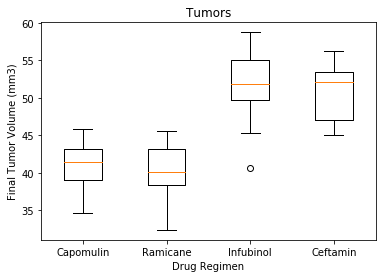

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# use example from class, except put all regimens to be plot in the same box plot
data_to_plot = [final_average_capomulin,final_average_ramicane,final_average_infubinol,final_average_ceftamin]

bluecircle = dict(markerfacecolor='B', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])

plt.show()

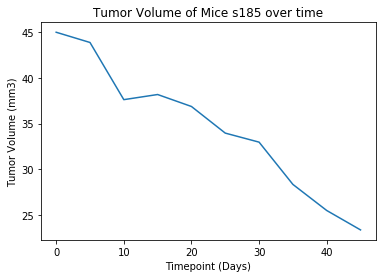

In [17]:
# * Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.
# picked one from the dataframe above capomulin.df
# use example from class

line_plot_capomulin = pyma_data.loc[pyma_data["Drug Regimen"] == "Capomulin", :]
line_plot = pyma_data.loc[pyma_data["Mouse ID"] == "s185", :]

x_axis= line_plot["Timepoint"]
points= line_plot["Tumor Volume (mm3)"]

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume of Mice s185 over time')

plt.plot(x_axis, points)
plt.show()

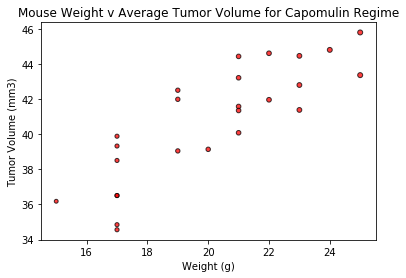

In [18]:
# * Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
line_plot_capomulin = pyma_data.loc[pyma_data["Drug Regimen"] == "Capomulin", :]

# use data above to calculate the average of the tumor based on each mouse- mean of the mouse id

scatter_plot=line_plot_capomulin.groupby(['Mouse ID']).mean()
# final_average_capomulin=capomulin.groupby(['Mouse ID','Drug Regimen']).mean()["Tumor Volume (mm3)"]


x_axis= scatter_plot['Weight (g)']
data= scatter_plot['Tumor Volume (mm3)']

plt.title("Mouse Weight v Average Tumor Volume for Capomulin Regime")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)



In [19]:
# * Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume 
# for the Capomulin treatment

correlation = st.pearsonr(x_axis,data)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


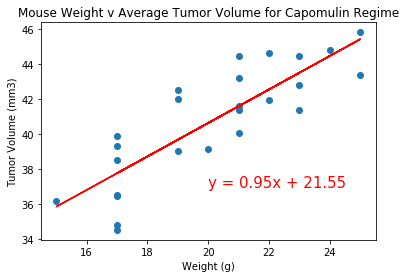

In [126]:
# Plot the linear regression model on top of the previous scatter plot.

x_axis= scatter_plot['Weight (g)']
data= scatter_plot['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,data)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.title("Mouse Weight v Average Tumor Volume for Capomulin Regime")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()